<a href="https://colab.research.google.com/github/soupriyaaa/ml-lab-assignments/blob/main/09-regression_evaluation/exp_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Dataset Shape:", X.shape)
print("Missing Values:\n", X.isnull().sum())

Dataset Shape: (442, 10)
Missing Values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [ ]:
X.fillna(X.mean(), inplace=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    return np.sum(np.abs(y_true - y_pred)) / n

def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / n

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score_custom(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

def adjusted_r2_score(y_true, y_pred, p):
    n = len(y_true)
    if n > p + 1:
        r2 = r2_score_custom(y_true, y_pred)
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)
    else:
        return None

In [ ]:
n, p = X_test.shape
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score_custom(y_test, y_pred)
adj_r2 = adjusted_r2_score(y_test, y_pred, p)

In [ ]:
print("\n Regression Evaluation Metrics ")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")
print(f"R²        : {r2:.4f}")
if adj_r2 is not None:
    print(f"Adjusted R²: {adj_r2:.4f}")
else:
    print("Adjusted R²: Not applicable (n <= p+1)")


 Regression Evaluation Metrics 
MAE       : 42.7941
MSE       : 2900.1936
RMSE      : 53.8534
R²        : 0.4526
Adjusted R²: 0.3824


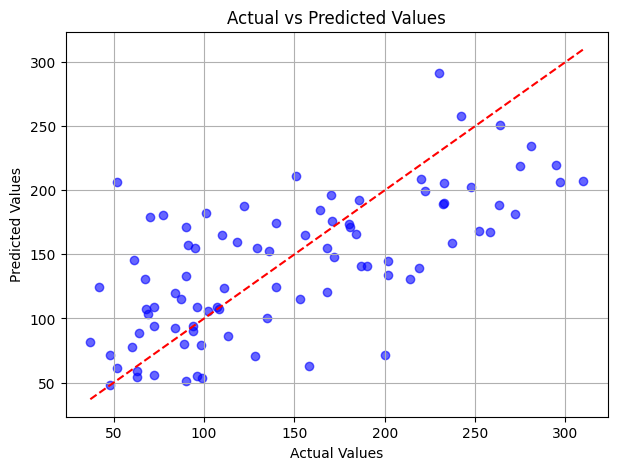

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

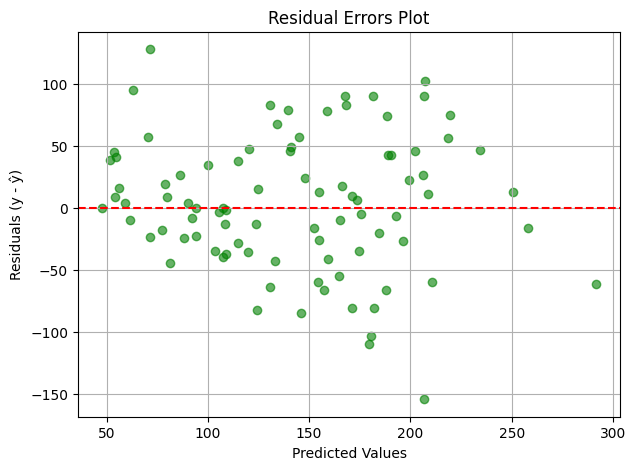

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Errors Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y - ŷ)")
plt.grid(True)
plt.show()

In [ ]:
results = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'Adjusted R²'],
    'Value': [mae, mse, rmse, r2, adj_r2]
})
print("\n Result Table ")
print(results)


 Result Table 
        Metric        Value
0          MAE    42.794095
1          MSE  2900.193628
2         RMSE    53.853446
3           R²     0.452603
4  Adjusted R²     0.382424
